In [27]:
# Import the necessary libraries
from skimage.feature import hog
import joblib
import glob
import os
from PIL import Image  # Import Pillow
import cv2
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import LabelEncoder
import time

In [28]:
train_data = []
train_labels = []
pos_im_path = 'D:\Belajar Python\BAHAN_TA\DATASET_DROWN\crop_pos'
neg_im_path = 'D:\Belajar Python\BAHAN_TA\DATASET_DROWN\crop_neg'
# pos_im_path = 'DATAIMAGE/all_positive'
# neg_im_path = 'DATAIMAGE/all_negative'
model_path = 'models/'
hog_lengths = []

# Count the number of positive samples
num_pos_samples = len(glob.glob(os.path.join(pos_im_path + "/*")))

# Count the number of negative samples
num_neg_samples = len(glob.glob(os.path.join(neg_im_path + "/*")))

# Display the counts
print("Number of positive samples:", num_pos_samples)
print("Number of negative samples:", num_neg_samples)

Number of positive samples: 2152
Number of negative samples: 2787


Load the positive features

In [29]:
# Load the positive features
for filename in glob.glob(os.path.join(pos_im_path + "/*")):
    fd = cv2.imread(filename, 0)
    fd = cv2.resize(fd, (64, 128))
    # fd = cv2.resize(fd, (56, 120))
    fd = hog(fd, orientations=9, pixels_per_cell=(8, 8), visualize=False, cells_per_block=(3, 3))
    # fd = hog(fd, orientations=8, pixels_per_cell=(16,16), visualize=False, cells_per_block=(1, 1))
    train_data.append(fd)
    train_labels.append(1)
    hog_lengths.append(len(fd))

Load the negative features

In [30]:
# Load the negative features
for filename in glob.glob(os.path.join(neg_im_path + "/*")):
    fd = cv2.imread(filename, 0)
    fd = cv2.resize(fd, (64, 128))
    # fd = cv2.resize(fd, (56, 120))
    fd = hog(fd, orientations=9, pixels_per_cell=(8, 8), visualize=False, cells_per_block=(3, 3))
    # fd = hog(fd, orientations=8, pixels_per_cell=(16,16), visualize=False, cells_per_block=(1, 1))
    train_data.append(fd)
    train_labels.append(0)
    hog_lengths.append(len(fd))

In [31]:
# Convert the lists to NumPy arrays
train_data = np.array(train_data, dtype=np.float32)
train_labels = np.array(train_labels)

# Display the number of data points used for training
print("Number of data points used for training:", len(train_data))

Number of data points used for training: 4939


In [32]:
# Menampilkan panjang vektor fitur HOG untuk semua gambar
for i, length in enumerate(hog_lengths):
    # print('Panjang vektor fitur HOG untuk gambar {}: {}'.format(i + 1, length))
    print('Panjang vektor fitur HOG untuk gambar: {}'.format(length))

Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk gambar: 6804
Panjang vektor fitur HOG untuk g

In [33]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)



In [34]:
# Measure the start time
start_time = time.time()
# Classification with SVM
print('Data Prepared........')
print('Train Data:',len(train_data))
print('Train Labels (1,0)',len(train_labels))

model = LinearSVC(dual='auto', max_iter=10000)

print('Training Support Vector Machine...')
model.fit(X_train, y_train)
joblib.dump(model, 'models/model_crop_new.dat')
print('Model saved: {}'.format('model_crop_new.dat'))

Data Prepared........
Train Data: 4939
Train Labels (1,0) 4939
Training Support Vector Machine...
Model saved: model_crop_new.dat


In [35]:
# Measure the end time
end_time = time.time()

# Calculate the duration
duration = end_time - start_time
print('Training duration: {:.2f} seconds'.format(duration))

Training duration: 104.95 seconds


In [36]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Display the counts
print("Number of positive samples:", num_pos_samples)
print("Number of negative samples:", num_neg_samples)

print(f"Classification report for classifier {model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Number of positive samples: 2152
Number of negative samples: 2787
Classification report for classifier LinearSVC(dual='auto', max_iter=10000):
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       554
           1       0.80      0.77      0.79       434

    accuracy                           0.82       988
   macro avg       0.81      0.81      0.81       988
weighted avg       0.82      0.82      0.82       988


Accuracy: 81.58%


In [37]:
# 5. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 6. Tampilkan hasil
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[470  84]
 [ 98 336]]


In [38]:
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8157894736842105
Precision: 0.8
Recall: 0.7741935483870968


In [39]:
# Display the results
print('Number of samples in the entire dataset:', len(train_data))
print('Number of samples in the training set:', len(X_train))
print('Number of samples in the testing set:', len(X_test))
print('\nLabel distribution in the entire dataset:')
print('Class 1 (Positive):', sum(train_labels == 1))
print('Class 0 (Negative):', sum(train_labels == 0))
print('\nLabel distribution in the training set:')
print('Class 1 (Positive):', sum(y_train == 1))
print('Class 0 (Negative):', sum(y_train == 0))
print('\nLabel distribution in the testing set:')
print('Class 1 (Positive):', sum(y_test == 1))
print('Class 0 (Negative):', sum(y_test == 0))


Number of samples in the entire dataset: 4939
Number of samples in the training set: 3951
Number of samples in the testing set: 988

Label distribution in the entire dataset:
Class 1 (Positive): 2152
Class 0 (Negative): 2787

Label distribution in the training set:
Class 1 (Positive): 1718
Class 0 (Negative): 2233

Label distribution in the testing set:
Class 1 (Positive): 434
Class 0 (Negative): 554


In [40]:
from sklearn import metrics

# Prediksi kelas dari data uji
y_pred = model.predict(X_test)

# Menghitung matriks kebingungan
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Ekstrak nilai True Positive (TP), True Negative (TN), False Positive (FP), dan False Negative (FN) dari matriks kebingungan
tp = conf_matrix[1, 1]  # True Positive
tn = conf_matrix[0, 0]  # True Negative
fp = conf_matrix[0, 1]  # False Positive
fn = conf_matrix[1, 0]  # False Negative

# Menghitung nilai akurasi
accuracy = metrics.accuracy_score(y_test, y_pred)

# Menghitung total data
total_data = len(y_test)

# Menampilkan nilai True Positive, True Negative, False Positive, False Negative, total data, dan Akurasi
print(f'True Positive (TP): {tp}')
print(f'True Negative (TN): {tn}')
print(f'False Positive (FP): {fp}')
print(f'False Negative (FN): {fn}')
print(f'Total Data: {total_data}')
print("Accuracy:", accuracy)

True Positive (TP): 336
True Negative (TN): 470
False Positive (FP): 84
False Negative (FN): 98
Total Data: 988
Accuracy: 0.8157894736842105


True Positive (TP): 336
True Negative (TN): 470
False Negative (FN): 98


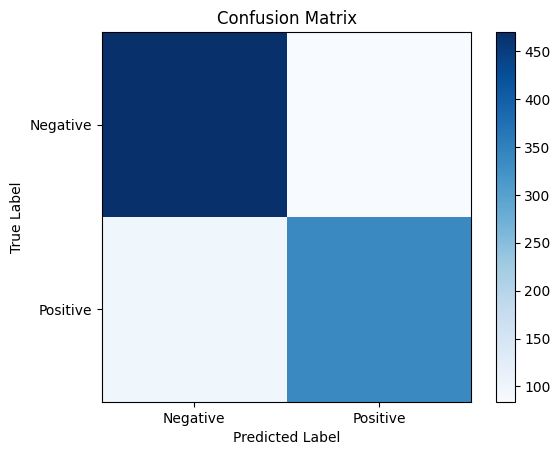

In [41]:
import matplotlib.pyplot as plt
# Confusion Matrix
y_pred_binary = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot Confusion Matrix
plt.figure()
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display True Positive (TP) and False Negative (FN)
tp = conf_matrix[1, 1]  # True Positive
tn = conf_matrix[0, 0]  # True Negative
fn = conf_matrix[1, 0]  # False Negative

print(f'True Positive (TP): {tp}')
print(f'True Negative (TN): {tn}')
print(f'False Negative (FN): {fn}')

plt.show()